# Actividad 2: Streaming - adquisición y análisis de datos

# Introducción

En esta actividad, exploraremos dos de las tecnologías más populares utilizadas para la adquisición y análisis de datos en tiempo real: **Apache Kafka** y **Apache Spark Streaming**. A través de una serie de ejercicios, aprenderéis los conceptos básicos de estas tecnologías y cómo usarlas para procesar datos en tiempo real.

## Estructura

Hemos dividido esta actividad en tres partes:

1.  **Introducción a Apache Kafka:** En esta primera parte, aprenderéis los conceptos básicos de Apache Kafka, 
    sus principales componentes y cómo interactuar con ellos utilizando la interfaz de línea de comandos.
2.  **Ingesta de datos con Apache Kafka:** En esta segunda parte, aprenderéis a utilizar Apache Kafka para ingerir
    datos desde un productor y consumirlos desde un consumidor.
3.  **Procesamiento de datos en tiempo real con Apache Spark Streaming:** En esta tercera parte, aprenderéis a usar 
    Apache Spark Streaming para procesar datos en tiempo real provenientes de Apache Kafka.
    

## Notas importantes:

- La actividad debe realizarse en **grupos de 2 miembros**. 
  Asegúrate de saber quién es tu compañero antes de comenzar la actividad.
- Aunque es posible completar las actividades directamente en este cuaderno, **desaconsejamos hacerlo** debido a posibles problemas de rendimiento del servidor. Verás que cada actividad está   contenida en su propia celda, lo que te permitirá copiarla fácilmente a un archivo Python. Este archivo puede ser **ejecutado en el servidor utilizando el terminal de Jupyterlab, SSH o VSCode**. Una vez que hayas ejecutado y probado el script con éxito,   simplemente cópialo de nuevo en la celda correspondiente del cuaderno. Este enfoque garantiza una ejecución más fluida y una mejor gestión de los recursos del servidor.
- En algunos ejercicios, necesitarás tomar **capturas de pantalla para justificar tus respuestas**. 
  Puedes capturar imágenes utilizando las herramientas del sistema operativo que estés usando: "Recortes" en         Windows, "Imprimir pantalla",\" `Ctrl+C` al seleccionar una imagen, etc. 
  Una vez capturadas, puedes pegar las imágenes directamente en las celdas de respuesta usando `Ctrl+V` o el menú     contextual que aparece al hacer clic derecho, que permitirá pegar la imagen del portapapeles. 
  Para visualizar la imagen, debes ejecutar la celda.
- **Debes utilizar únicamente las bibliotecas proporcionadas, a menos que se indique lo contrario.**
- Por favor, no cambies el nombre del cuaderno ni el tipo de las celdas.



# Parte I: Introducción a Apache Kafka (2 puntos)

[Kafka](https://kafka.apache.org) es una plataforma distribuida para gestionar 
eventos en streaming que nos permite leer, escribir y procesar eventos 
(registros o mensajes, según la terminología de Kafka) distribuidos a lo largo de un clúster.

Comenzaremos la actividad creando un tema llamado `activity2<usuario>`
en el servicio de Kafka de nuestro clúster (sustituye `<usuario>` por tu nombre de usuario). 
Un tema es una colección ordenada de eventos que se almacena de forma persistente, generalmente en disco,
y se distribuye y replica. Kafka trata cada tema en cada partición como un registro 
(un conjunto ordenado de mensajes). Cada mensaje en una partición tiene un desplazamiento único, 
y estos mensajes tienen un período de retención predeterminado de 7 días (604,800,000 ms), 
aunque puedes modificarlo en el momento de la creación del tema.

El broker de Kafka es `eimtcld3node1`, accesible en el puerto estándar 9092.

## Ejercicio 1: Crear un tema con Kafka (0.25 puntos)

Crea un tema de Kafka llamado `activity2<usuario>` en nuestro clúster con un 
factor de replicación de 1 y una única partición, lo que significa que usaremos 
un solo nodo para almacenar los mensajes que recibe Kafka. 
Además, especifica que los mensajes solo se almacenen durante 2 horas en el tema.

Usando el comando `kafka-topics.sh` creo un nuevo tema en Kafka llamado `activity2jubedaq` con configuraciones específicas:
* **Nombre del tema:** `activity2jubedaq` - Es el identificador único que se usará para publicar y consumir mensajes.
* **Factor de replicación 1:** Los datos solo se almacenan en un nodo (sin copias de respaldo).
* **1 partición:** Todo el flujo de datos pasa por una única partición.
* **Retención de 2 horas:** Los mensajes se eliminan automáticamente después de 7,200,000 ms (2 horas).

In [ ]:
!kafka-topics.sh --create --topic activity2jubedaq --bootstrap-server eimtcld3node1:9092 --replication-factor 1 --partitions 1 --config retention.ms=7200000

Created topic activity2jubedaq.


Este mensaje confirma que Kafka ha creado exitosamente el tema y está listo para recibir mensajes.

**Explicación de los parámetros:**

- `--create`: Indica que queremos crear un nuevo tema.
- `--topic`: Nombre del tema.
- `--bootstrap-server`: Dirección del servidor Kafka (broker).
- `--replication-factor 1`: Solo una copia de los datos.
- `--partitions 1`: El tema se divide en una sola partición.
- `--config retention.ms=7200000`: Configura el tiempo de retención de mensajes a 7,200,000 milisegundos (2 horas).

## Ejercicio 2: Lista los temas de Kafka (0.25 puntos)

Consulta el *tema* que acabas de crear y muéstralo.

Ahora seguimos listando los temas disponibles en el clúster de Kafka. Utilizo `--list` para obtener todos los temas y luego `grep` para filtrar el mío y comprobar que aparece correctamente.

In [1]:
!kafka-topics.sh --list --bootstrap-server eimtcld3node1:9092 | grep activity2jubedaq

activity2jubedaq


El hecho de que aparezca `activity2jubedaq` en la lista confirma que el tema se creó correctamente y está disponible en el broker. 
> Si el tema no apareciera, indicaría un problema en la creación.

## Ejercicio 3: Borra el tema de Kafka (0.25 puntos)

Borra el *tema* que creaste en el Ejercicio 1

En este paso elimino el tema `activity2jubedaq` del clúster. Para ello utilizo el comando `--delete`. 

In [3]:
!kafka-topics.sh --delete --topic activity2jubedaq --bootstrap-server eimtcld3node1:9092

Después vuelvo a listar los temas para confirmar que ya no aparece. Esto me permite verificar que el borrado se realizó correctamente.

In [5]:
!kafka-topics.sh --list --bootstrap-server eimtcld3node1:9092 | grep activity2jubedaq

## Ejercicio 4: Describe el tema de Kafka (0.25 puntos)

Crea el *tema* de nuevo tal y como hiciste en el Ejercicio 1 y utiliza la línea de comandos de kafka para decribirlo.

A continuación vuelvo a crear el tema exactamente igual que en el ejercicio 1. 

Una vez creado, utilizo `--describe` para obtener informacioón detallada sobre su configuración: número de particiones, factor de replicación, configuración del tiempo de retención y qué nodo actúa como líder.

In [21]:
!kafka-topics.sh --create --topic activity2jubedaq --bootstrap-server eimtcld3node1:9092 --replication-factor 1 --partitions 1 --config retention.ms=7200000 && kafka-topics.sh --describe --topic activity2jubedaq --bootstrap-server eimtcld3node1:9092

Created topic activity2jubedaq.
Topic: activity2jubedaq	TopicId: n5NcE47QRdC633njabzZXQ	PartitionCount: 1	ReplicationFactor: 1	Configs: compression.type=producer,min.insync.replicas=1,segment.bytes=1073741824,retention.ms=7200000,max.message.bytes=1000000,index.interval.bytes=4096,retention.bytes=-1,segment.index.bytes=10485760
	Topic: activity2jubedaq	Partition: 0	Leader: 1001	Replicas: 1001	Isr: 1001


La salida muestra correctamente que:

* **Created topic** `activity2jubedaq` -> Confirma que el tema se ha creado correctamente.
* **PartitionCount: 1** -> El topic tiene una única partición.
* **ReplicationFactor: 1** -> El topic se replica en un solo nodo.
* **Configs: retention.ms=7200000** -> Los mensajes se mantienen 2 horas antes de eliminarse automáticamente.
* **Leader: 1001, Replicas: 1001, Isr: 1001** -> La partición tiene solo un nodo que es 1001, y actúa como líder, réplica y réplica sincronizada.

## Ejercicio 5: Crea un productor en Kafka (0.5 puntos)

Vamos a crear un evento en el tema. Recuerda que este comando debe ejecutarse
desde la terminal para interactuar. Recuerda usar `CTRL+c` cuando hayas terminado de enviar los mensajes.

Ahora abro un productor interactivo de Kafka en la terminal donde puedo escribir mensajes manualmente. Cada mensaje que escribo se envía directamente al tema `activity2jubedaq`. 

El resultado se puede observar en la consola:

In [ ]:
# YOUR CODE HERE
kafka-console-producer.sh --topic activity2jubedaq --bootstrap-server eimtcld3node1:9092

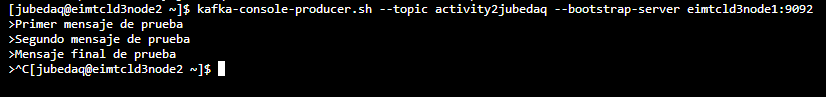

## Ejercicio 6: Crea un consumidor en Kafka (0.5 puntos)

Finalmente, se te pide consultar los mensajes enviados a través de la terminal 
utilizando el consumidor incorporado de Kafka para el tema. Específicamente, debes ejecutar 
un consumidor conectándote a los distintos brokers existentes y especificando el tema 
y la partición a los que se han enviado los mensajes. Puedes abrir dos terminales 
y verificar que los mensajes enviados con el productor al broker pueden ser 
visualizados con el consumidor de consola.

Para comprobar los mensajes enviados, abro un consumidor de Kafka en otra terminal. De este modo, mientras el productor envía mensajes, el consumidor los va mostrando en tiempo real (patron [publish/subscribe](https://medium.com/@diego.coder/introducci%C3%B3n-a-apache-kafka-d1118be9d632) de Kafka), lo que permite ver la ingesta simultánea.

In [ ]:
# YOUR CODE HERE
kafka-console-consumer.sh --bootstrap-server eimtcld3node1:9092 --topic activity2jubedaq --from-beginning

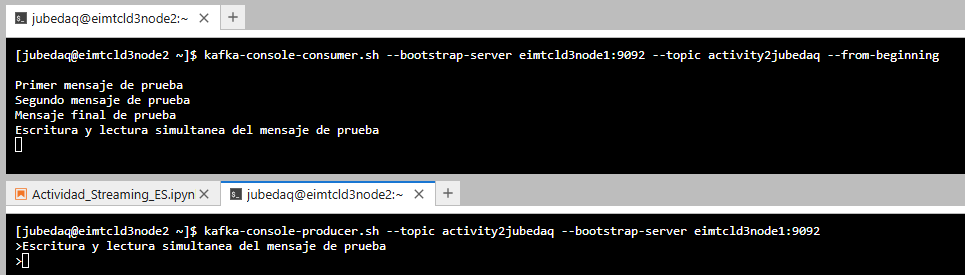

> Es importante utilizar el parámetro `--from-beginning` para leer todos los mensajes desde el inicio del topic. 

# Parte II: Ingesta de datos con Apache Kafka (1.5 puntos)

Para automatizar la generación y consumo de datos, es común trabajar 
con un lenguaje de programación como Python, en lugar de hacerlo directamente en Bash. 
En las siguientes preguntas, exploraremos la funcionalidad de Kafka utilizando Python con la biblioteca predeterminada, que **NO DEBES INSTALAR, ya que ya está disponible en la versión correcta**. 
Toda la documentación asociada con la API proporcionada la puedes encontrar en 
[Kafka](https://kafka-python.readthedocs.io/en/master/). Comenzaremos con lo básico que 
ya hemos cubierto: escribir en el tema de Kafka.
Para esto, configuraremos [Kafka
producer](https://kafka-python.readthedocs.io/en/master/apidoc/KafkaProducer.html)
que insertará valores numéricos en un tema de Kafka cada 3 segundos. 
Mientras el productor escribe, procederemos a leer los mensajes en la pregunta 8.

## Ejercicio 7: Escribe un tema en Kafka (0.5 puntos)


Se te pide escribir una secuencia numérica de 300 números (del 1 al 300) 
en el tema de Kafka activity2<usuario> que acabamos de crear. Cada uno de 
los mensajes escritos en el tema debe contener información sobre el tema donde se escriben, 
una clave y el valor binario del número a escribir (por ejemplo, value=b'287'). 
Es esencial revisar la API asociada con el 
[Kafka producer](https://kafka-python.readthedocs.io/en/master/apidoc/KafkaProducer.html) 
para completar estos ejercicios.

Para guiarte en el ejercicio, te proporcionamos una plantilla que puedes usar para completarlo. Debes completar las partes faltantes del código en la celda de código a continuación.
   

In [ ]:
from kafka import KafkaProducer
import numpy as np
<FILL_IN>
for i in range(1,300):
    <FILL_IN>
producer.flush()

Pasamos ahora al productor en Python. Comenzamos creando el objeto `KafkaProducer` y configurando el servidor bootstrap. Después automatizo el envío de 300 números a mí tema de Kafka (`activity2jubedaq`) usando la biblioteca `kafka` de python.

En cada iteración convierto el número en bytes para la clave y en binario para el valor. Luego envío el mensaje al tema y muestro por pantalla qué se ha enviado. Finalmente, añado un sleep de 3 segundos y cierro el productor al terminar.

El resultado del código es que los números se van enviando al tema de manera continua cada pocos segundos como se observa en la salida del código:

In [2]:
# YOUR CODE HERE
from kafka import KafkaProducer
import time

# Configuración del productor y crear variable para el tema
producer = KafkaProducer(bootstrap_servers='eimtcld3node1:9092')
topic = 'activity2jubedaq'

# Enviar numeros del 1 al 300 cada 3s
for i in range(1, 301):
    # Clave: número como bytes
    key = str(i).encode('utf-8')
    # Valor: representación binaria del número
    value = bin(i).encode('utf-8')
    # Enviar mensajes al tema
    producer.send(topic, key=key, value=value)

    # Mostrar en consola qué mensaje se ha enviado
    print(f"Mensaje enviado: key={i}, value={bin(i)}")

    # Esperar 3 segundos antes de enviar el siguiente mensaje
    time.sleep(3)

# Todos los mensajes serán enviados antes de cerrar
producer.flush()

Mensaje enviado: key=1, value=0b1
Mensaje enviado: key=2, value=0b10
Mensaje enviado: key=3, value=0b11
Mensaje enviado: key=4, value=0b100
Mensaje enviado: key=5, value=0b101
Mensaje enviado: key=6, value=0b110
Mensaje enviado: key=7, value=0b111
Mensaje enviado: key=8, value=0b1000
Mensaje enviado: key=9, value=0b1001
Mensaje enviado: key=10, value=0b1010
Mensaje enviado: key=11, value=0b1011
Mensaje enviado: key=12, value=0b1100
Mensaje enviado: key=13, value=0b1101
Mensaje enviado: key=14, value=0b1110
Mensaje enviado: key=15, value=0b1111
Mensaje enviado: key=16, value=0b10000
Mensaje enviado: key=17, value=0b10001
Mensaje enviado: key=18, value=0b10010
Mensaje enviado: key=19, value=0b10011
Mensaje enviado: key=20, value=0b10100
Mensaje enviado: key=21, value=0b10101
Mensaje enviado: key=22, value=0b10110
Mensaje enviado: key=23, value=0b10111
Mensaje enviado: key=24, value=0b11000
Mensaje enviado: key=25, value=0b11001
Mensaje enviado: key=26, value=0b11010
Mensaje enviado: key=

**Explicación del código:**

- Se inicializa el `KafkaProducer` apuntando al servidor bootstrap.
- Se itera del 1 al 300.
- `producer.send` envía el mensaje de forma asíncrona.
- `time.sleep(3)` introduce el retardo requerido.
- `producer.flush()` asegura que todos los mensajes se envíen antes de cerrar.

## Ejercicio 8: Leer un tema de Kafka (1 punto)

Usando la biblioteca de Python para Kafka, 
[Kafka](https://kafka-python.readthedocs.io/en/master/),
lee los mensajes enviados en el ejercicio 7, mostrando solo los valores, 
no las otras propiedades del mensaje. Es importante revisar el uso de Kafka en 
([Python](https://kafka-python.readthedocs.io/en/master/usage.html))
y los parámetros del consumidor de 
[Kafka
consumer](https://kafka-python.readthedocs.io/en/master/apidoc/KafkaConsumer.html).

Como en el ejercicio anterior, aquí te proporcionamos una plantilla que puedes usar para completar el ejercicio. Debes completar las partes faltantes del código.

In [ ]:
from kafka import KafkaConsumer
<FILL_IN>
for message in consumer:
    <FILL_IN>

Seguimos creando un consumidor en Python para leer los mensajes del ejercicio anterior. 

Comienzo configurando `KafkaConsumer` con lectura desde el principio del tema. 

Luego recorro cada mensaje recibido y muestro únicamente su valor decodificado. El consumidor se cierra automáticamente cuando pasa un tiempo sin recibir nuevos mensajes.

El resultado del código es que en la consola puedo ver todos los valores binarios enviados previamente:

In [9]:
# YOUR CODE HERE
from kafka import KafkaConsumer

# Nombre del topic
topic = 'activity2jubedaq'

# Crear consumidor
consumer = KafkaConsumer(
    topic,
    bootstrap_servers='eimtcld3node1:9092',
    auto_offset_reset='earliest',   # leer desde el principio
    enable_auto_commit=True,
    consumer_timeout_ms=5000        # termina si no hay más mensajes
)

# Leer todos los mensajes
print("Mensajes existentes en el tema:")
for message in consumer:
    # Mostrar solo el valor de cada mensaje
    print(message.value.decode('utf-8'))

Mensajes existentes en el tema:
Primer mensaje de prueba
Segundo mensaje de prueba
Mensaje final de prueba
Escritura y lectura simultanea del mensaje de prueba
0b1
0b10
0b11
0b100
0b101
0b110
0b111
0b1000
0b1001
0b1010
0b1011
0b1100
0b1101
0b1110
0b1111
0b10000
0b10001
0b10010
0b10011
0b10100
0b10101
0b10110
0b10111
0b11000
0b11001
0b11010
0b11011
0b11100
0b11101
0b11110
0b11111
0b100000
0b100001
0b100010
0b100011
0b100100
0b100101
0b100110
0b100111
0b101000
0b101001
0b101010
0b101011
0b101100
0b101101
0b101110
0b101111
0b110000
0b110001
0b110010
0b110011
0b110100
0b110101
0b110110
0b110111
0b111000
0b111001
0b111010
0b111011
0b111100
0b111101
0b111110
0b111111
0b1000000
0b1000001
0b1000010
0b1000011
0b1000100
0b1000101
0b1000110
0b1000111
0b1001000
0b1001001
0b1001010
0b1001011
0b1001100
0b1001101
0b1001110
0b1001111
0b1010000
0b1010001
0b1010010
0b1010011
0b1010100
0b1010101
0b1010110
0b1010111
0b1011000
0b1011001
0b1011010
0b1011011
0b1011100
0b1011101
0b1011110
0b1011111
0b1100000


**Explicación del código:**

- `KafkaConsumer` se suscribe al tema.
- El bucle `for` itera sobre los mensajes recibidos.
- `auto_offset_reset='earliest'`: Garantiza que lees todos los mensajes históricos, no solo los nuevos
- `consumer_timeout_ms`: Evita que el consumidor se quede esperando indefinidamente
- `message.value` contiene el payload del mensaje (el número binario).

# Part III: Procesamiento de datos en tiempo real con Apache Spark Streaming (6.5 puntos)

En esta parte de la actividad, nos centraremos en el uso de Apache Spark para procesar datos en tiempo real. Aquí, utilizaremos:

-   [Spark Streaming](https://downloads.apache.org/spark/docs/3.3.0/streaming-programming-guide.html):
    Spark Streaming es un motor de procesamiento de flujos escalable y tolerante a fallos, 
    construido sobre Apache Spark. Permite el procesamiento de datos en tiempo real con alta capacidad de               rendimiento y baja latencia. Con Spark Streaming, puedes realizar análisis en tiempo real, 
    aprendizaje automático y procesamiento de grafos sobre datos en streaming.
-   [Spark Structured Streaming](https://downloads.apache.org/spark/docs/3.3.0/structured-streaming-programming-guide.html):
    Structured Streaming es una API de alto nivel para el procesamiento de flujos en Spark. Proporciona una             interfaz declarativa y similar a SQL para procesar datos de streaming estructurados.
    Con Structured Streaming, puedes escribir consultas de streaming que se integran de manera 
    fluida con el procesamiento por lotes, lo que te permite construir pipelines de procesamiento 
    de datos de extremo a extremo.
   

En esta parte de la actividad, nos centraremos en la red social Mastodon para procesar sus datos en streaming. Es una buena idea familiarizarse con la estructura JSON de un "toot".(check the link [Mastodon\'s API
webpage](https://docs.joinmastodon.org/entities/Status/)), para facilitar la comprensión de los diferentes ejercicios que proponemos

**Notas importantes:**

-   Ten en cuenta que, al usar la versión 3.3.0 de Apache Spark, puede haber diferencias en la API y otras características en comparación con las versiones más recientes. Asegúrate de consultar la documentación específica para esa versión cuando necesites más detalles.

-   Recuerda adjuntar una captura de pantalla del resultado de la ejecución de cada ejercicio en esta parte de la actividad.

## Ejercicio 10: Spark Streaming (3.5 puntos)

En este ejercicio, analizarás la actividad en Mastodon contando los toots en una ventana de tiempo. Contar es una de las operaciones fundamentales en Spark, y en esta actividad, aprovecharemos la biblioteca de Spark Streaming para mejorar nuestras capacidades de conteo.

### Ejercicio 10.1: Counting in Windows (0.5 puntos)

Como sabrás, la biblioteca Spark Streaming **procesa los datos utilizando el concepto de time windows**, 
agrupando los elementos de datos según el tiempo en que fueron recibidos. Este enfoque 
permite el procesamiento por lotes de datos de streaming, habilitando análisis **sobre intervalos de tiempo distintos**. Verás que la sintaxis para realizar operaciones sobre los RDDs dentro de estas ventanas de tiempo es **prácticamente equivalente a las operaciones estándar de RDD** que ya conoces.

Completa el código a continuación para obtener **el número de toots originales publicados cada cinco segundos**. Excluye los retweets de tu conteo. Puede que necesites consultar [Mastodon
API](https://docs.joinmastodon.org/entities/Status/) para entender cómo están estructurados los toots.

En este apartado he procesaso un stream de toots de Mastodon, y contando cuántos toots originales (no retweets) se publican cada 5 segundos.

Para ello, se han seleccionado toots que tienen contenido y donde `reblog` es `None` (o vacío), indicando que es un toot original utilizando el comando `filter()` y se han contado el numero de elmenetos en el RDD del batch actual (cada 5 segundos) utilizando el comando `count()`.

> Según indicación en el foro de la actividad se han eliminado las partes referentes a Kafka para utilizar como fuente de datos Socket.

In [ ]:
import findspark
findspark.init()

from pyspark import SparkContext
from pyspark.streaming import StreamingContext
import json

# Application name
app_name = 'TootCountApp'

# Create the SparkContext
try:
    sc = SparkContext("local[*]", appName=app_name)
except ValueError:
    sc.stop()
    sc = SparkContext("local[*]", appName=app_name)

sc.setLogLevel("ERROR")

# Streaming context every 5 seconds
batch_interval = 5  # Batch interval in seconds
ssc = StreamingContext(sc, batch_interval)
ssc.checkpoint("checkpoint") # Necessary for updateStateByKey operation

# Fuente de datos: socket (como se indica en las instrucciones del foro)
socket_host = "localhost"
socket_port = 9999
SocketStream = ssc.socketTextStream(socket_host, socket_port)

# Count original toots (exclude reblogs)
tootCounts = (
    SocketStream
        .map(lambda x: json.loads(x.strip()))
        .filter(lambda x: x.get("content") is not None and x.get("reblog") is None)
        .count()
)

# Print windowed count
tootCounts.pprint()

# Start streaming
ssc.start()
ssc.awaitTermination()

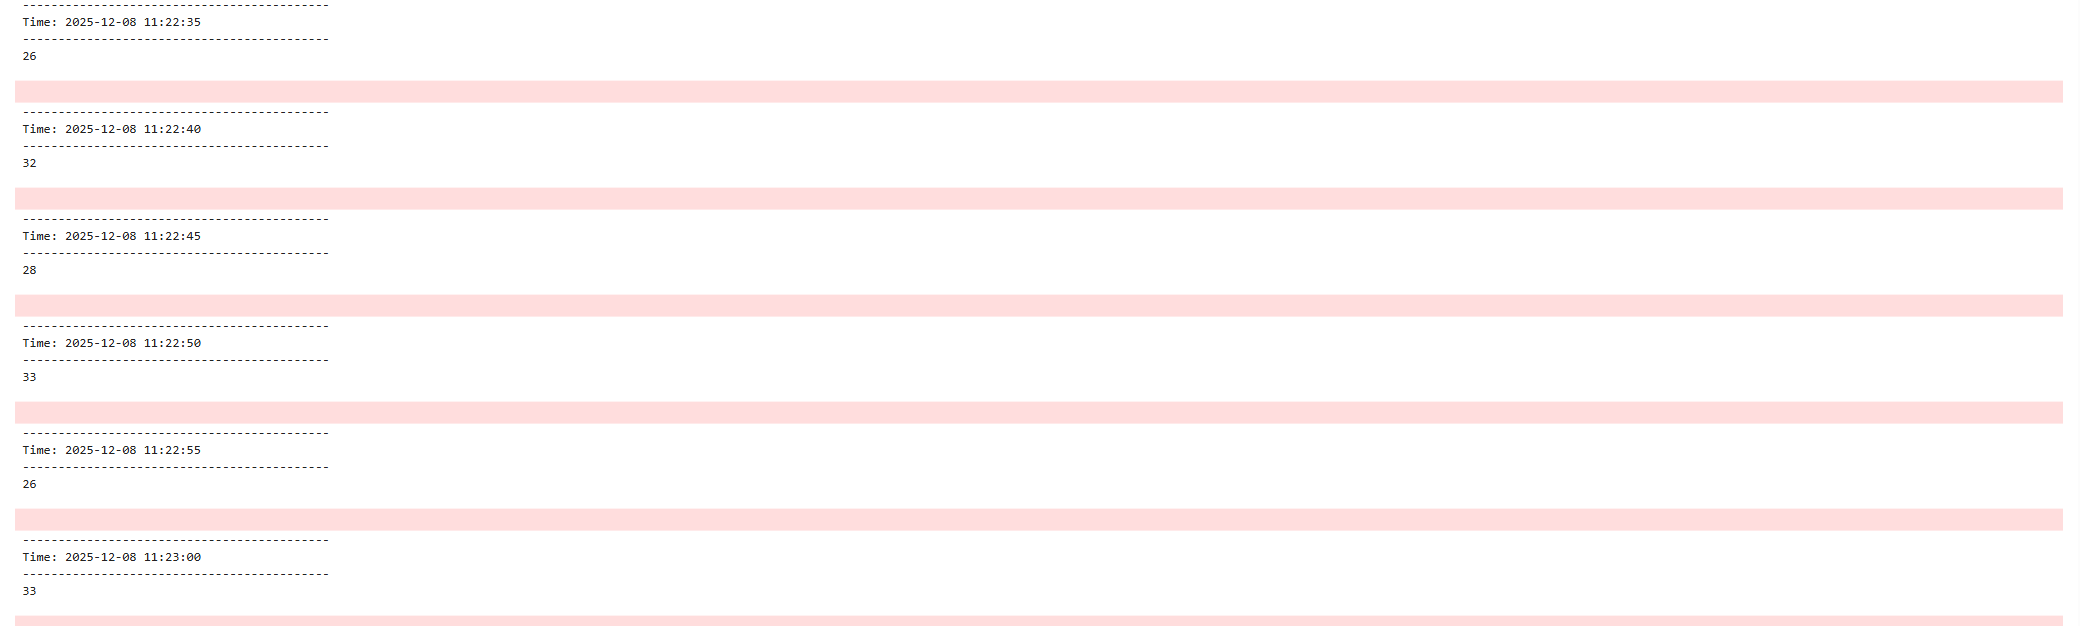

Cada salida muestra:

* **Timestamp:** Momento exacto del batch.
* **Número:** Cantidad de toots originales en esos 5 segundos.

### Ejercicio 10.2: Contando Toots por Idioma (0.5 puntos)

Como observaste en el Ejercicio 2.1, el proceso es bastante similar a trabajar con RDDs. 
Ahora, vamos a profundizar en un análisis más complejo al **contar cuántos toots originales se crean 
por idioma cada 5 segundos**. Para mejorar la legibilidad, te solicitamos que ordenes 
los idiomas en orden descendente según el número de toots y limites la salida a los 10 principales idiomas.

En este apartado, se extiende el ejercicio anterior para contar toots por idioma y mostrar el top 10:

Para ello, mapeo cada toot a un par `(idioma, 1)`. Luego, sumo los unos por idioma utilizando `reduceByKey`. Posteriormente, ordeno los resultados de mayor a menr frecuencia utilizando `sortBy`. Finalmente se muestran los top 10 mediante `pprint(10)`.

In [ ]:
import findspark
findspark.init()

from pyspark import SparkContext
from pyspark.streaming import StreamingContext
import json

# Initialize SparkContext and StreamingContext with a 1-second batch interval
app_name = "TootLangCountApp"  # Name of your application

# Create the SparkContext
try:
    sc = SparkContext("local[*]", appName = app_name)
except ValueError:
    sc.stop()
    sc = SparkContext("local[*]", appName = app_name)
    
sc.setLogLevel("ERROR")

# Create the StreamingContext
batch_interval = 5  # Batch interval in seconds
ssc = StreamingContext(sc, batch_interval)
ssc.checkpoint("checkpoint")  # Necessary for updateStateByKey operation

# Fuente de datos: socket (como se indica en las instrucciones del foro)
socket_host = "localhost"
socket_port = 9999

# Crear SocketStream
SocketStream = ssc.socketTextStream(socket_host, socket_port)

# Count the number of toots per language
tootLangCounts = (
    SocketStream
        .map(lambda x: json.loads(x.strip()))
        .filter(lambda x: x.get("content") is not None and x.get("reblog") is None)
        .map(lambda x: (x.get("language"), 1))
        .reduceByKey(lambda a, b: a + b)
        .transform(lambda rdd: rdd.sortBy(lambda x: x[1], ascending=False))
)

# Print the cumulative count
tootLangCounts.pprint(10)

# Start the computation
try:
    ssc.start()
    ssc.awaitTermination()
except KeyboardInterrupt:
    ssc.stop()
    sc.stop()

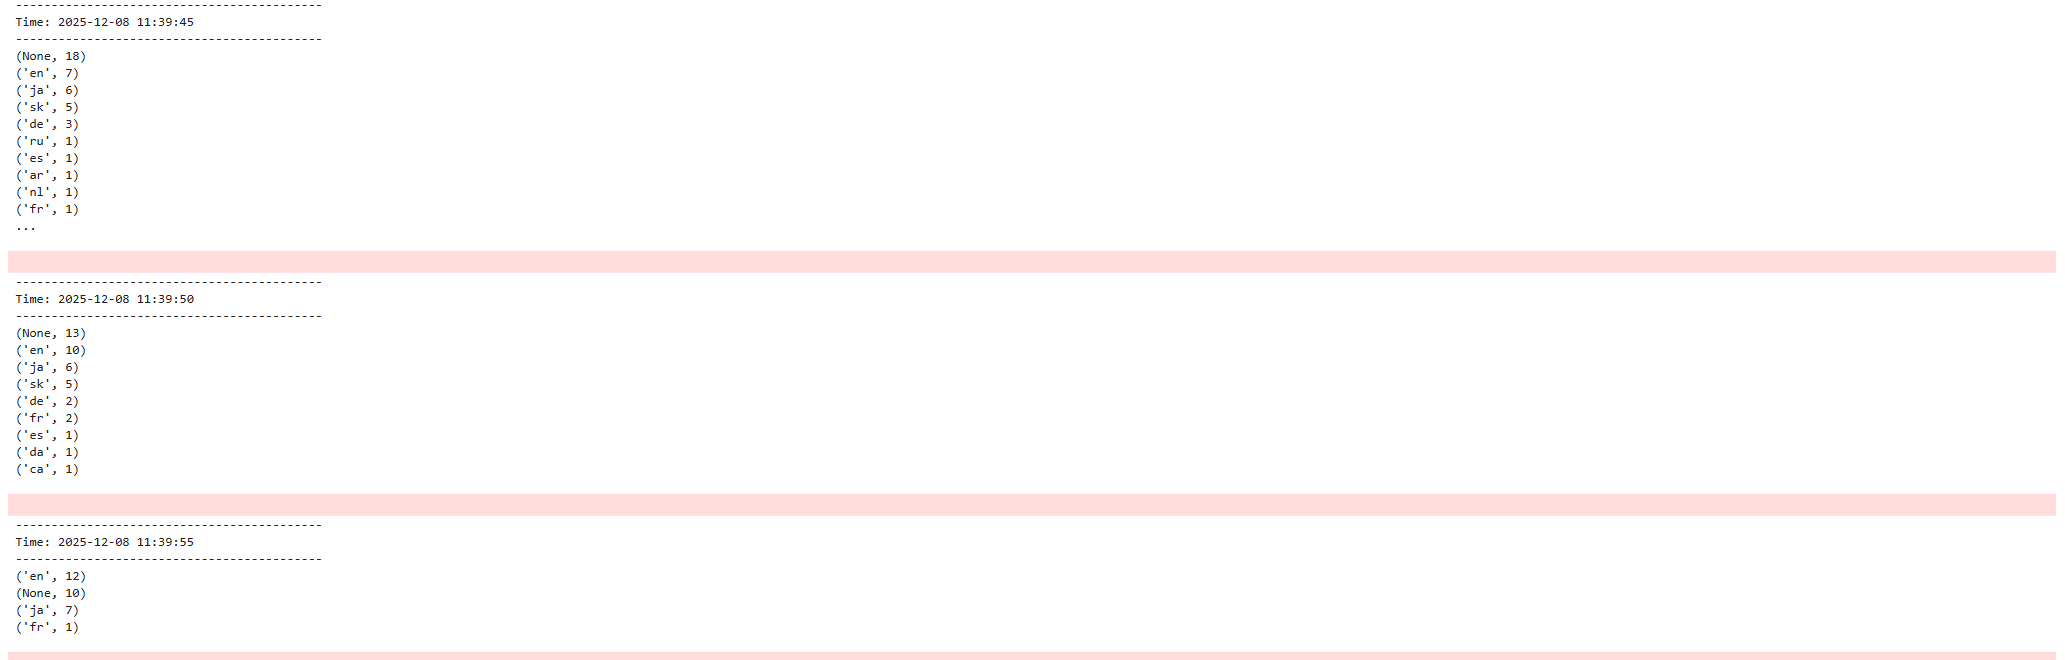

Cada salida muestra:

* Los **números cambian cada 5 segundos**, mostrando la dinámica en tiempo real
* **Timestamp:** Momento exacto del batch.
* **tupla (idioma, número de toots):** Cantidad de toots originales en esos 5 segundos por idioma.
* **Inglés domina claramente**, lo cual tiene sentido dado el alcance global de Mastodon.

### Ejercicio 10.3: Manteniendo el Conteo (0.5 puntos)


Hasta ahora, hemos estado obteniendo resultados específicos de lotes, lo cual es generalmente útil. 
Pero, ¿qué pasa si quieres obtener una visión más amplia, manteniendo la información a través de las 
ventanas para, por ejemplo, acumular tendencias a lo largo del tiempo? 
Ese es el enfoque de nuestra próxima exploración.

En este ejercicio, te invitamos a modificar el script anterior para **mantener un conteo acumulado de todos los toots originales, categorizados por idioma**. En lugar de simplemente contar nuevos toots cada cinco segundos, vamos a **sumarlos continuamente**. Piensa en ello como un marcador que se actualiza constantemente con el número total de toots originales en cada idioma desde el momento en que comenzamos a hacer streaming.

Para lograr esto, trabajaremos con las transformaciones 
[**stateful transformations in Spark Streaming**](https://downloads.apache.org/spark/docs/3.3.0/streaming-programming-guide.html#caching--persistence).
Esto es una forma sofisticada de decir que recordaremos los datos pasados y los utilizaremos 
en nuestros cálculos actuales. Es similar a mantener un total acumulado en una variable 
global en lugar de comenzar desde cero cada vez.

**Te invitamos a completar el siguiente script:**

En este apartado, se mantiene un contador histórico de toots por idioma que nunca se resetea, sumando continuamente los nuevos toots.

Para ello utilizo `updateStateByKey` que me permite mantener un estado (el conteo acumulado) a través de los batches, y cada batch actualiza ese estado sumando lo nuevo. Además, la función `updateFunction` suma los nuevos valores del batch actual al `runningCount` histórico.

In [ ]:
import findspark
findspark.init()

from pyspark import SparkContext
from pyspark.streaming import StreamingContext
import json

# Initialize SparkContext and StreamingContext with a 1-second batch interval
app_name = "TootLangCumulativeApp"  # Name of your application

# Create the SparkContext
try:
    sc = SparkContext("local[*]", appName = app_name)
except ValueError:
    sc.stop()
    sc = SparkContext("local[*]", appName = app_name)
    
sc.setLogLevel("ERROR")

# Create the StreamingContext
batch_interval = 5  # Batch interval in seconds
ssc = StreamingContext(sc, batch_interval)
ssc.checkpoint("checkpoint")  # Necessary for updateStateByKey operation

# Fuente de datos: socket (como se indica en las instrucciones del foro)
socket_host = "localhost"
socket_port = 9999

# Crear SocketStream
SocketStream = ssc.socketTextStream(socket_host, socket_port)

# Update the cumulative count using updateStateByKey
def updateFunction(newValues, runningCount):
    """
    newValues: lista de nuevos valores para la clave
    runningCount: acumulado total previo
    """
    return (runningCount or 0) + sum(newValues)

# Count each toot as 1 and update the total count
tootCounts = (
    SocketStream
        .map(lambda x: json.loads(x.strip()))
        .filter(lambda x: x.get("content") is not None and x.get("reblog") is None)
        .map(lambda x: (x.get("language"), 1))
        .updateStateByKey(updateFunction)           
        .transform(lambda rdd: rdd.sortBy(lambda x: x[1], ascending=False))  
)

# Print cumulative counts
tootCounts.pprint()

# Start streaming
try:
    ssc.start()
    ssc.awaitTermination()
except KeyboardInterrupt:
    ssc.stop()
    sc.stop()

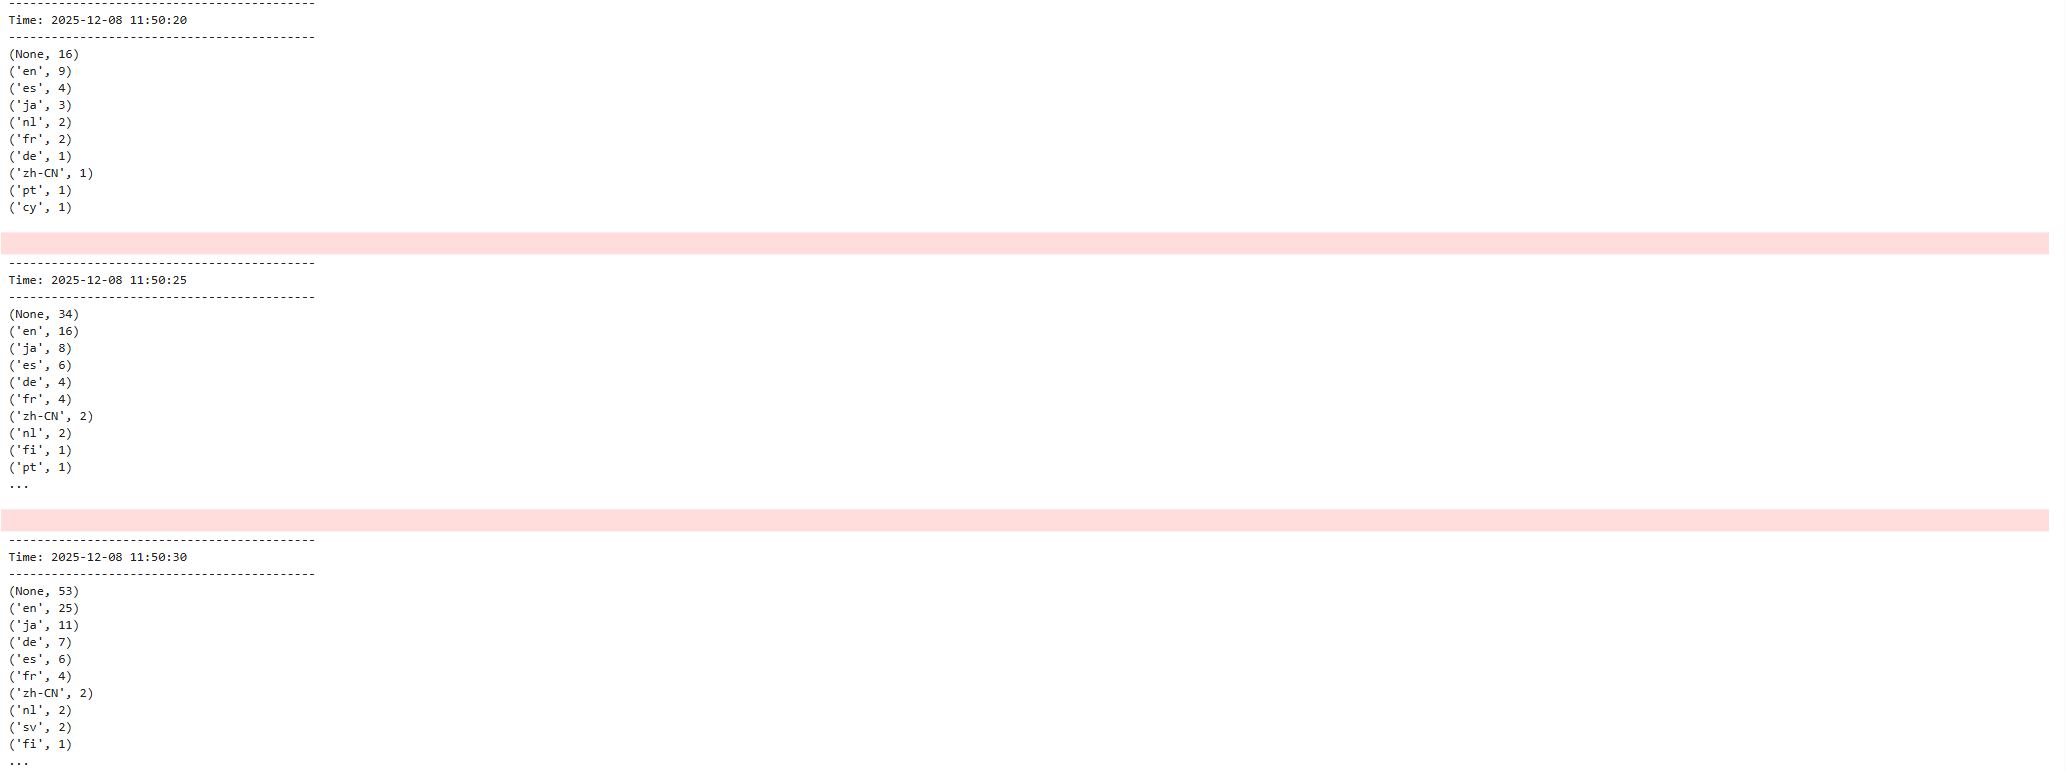

Se muestra por tanto que:
* **La principal diferencia entre este y el ejercicio anterior** es que mientras cada batch empezaba desde cero anteriormente, ahora se acumulan desde el inicio del stream.

### Ejercicio 10.4: Windowed Counting (1 punto)

Como has observado, Spark Streaming es increíblemente flexible y 
fácil de usar, y aquí tienes un truco interesante que puede realizar: 
**te permite encontrar un punto intermedio entre contar toots [time
window](https://downloads.apache.org/spark/docs/3.3.0/streaming-programming-guide.html#window-operations)
y mantener un total acumulado**. Imaginemos que queremos crear un panel de control, 
como un tablero, que muestre el número de toots realizados en cada idioma. 
El giro es que **queremos que esta actualización ocurra cada 5 segundos, 
pero estamos rastreando los conteos durante un minuto completo**.

Así, cada 5 segundos, nuestro panel se actualiza, proporcionándonos 
el último conteo acumulado durante un minuto. Es como tener un marcador en vivo 
que se actualiza con frecuencia y también realiza un seguimiento de lo que ha ocurrido 
en los últimos 60 segundos, no solo en los últimos 5. De esta forma, obtienes 
tanto actualizaciones inmediatas como una vista más amplia de lo que está ocurriendo, 
todo al mismo tiempo. Muestra solo los 10 principales idiomas.

**Modifica el siguiente script para lograr este objetivo:**


Ahora se implementa una ventana deslizante que cuenta toots en los últimos 60 segundos, actualizándose cada 5 segundos.
    
Para ello utilizo `reduceByKeyAndWindow` aplicando la reducción sobre una ventana de tiempo. Adidionalmente se crean dos funciones lambda:

* Una para sumar (cuando entran nuevos datos a la ventana) y
* otra para restar (cuando salen datos viejos de la ventana).

Esto permite que Spark no tenga que recomputar toda la ventana cada vez, sino que suma lo nuevo y resta lo que sale.
    

In [ ]:
import findspark
findspark.init()

from pyspark import SparkContext
from pyspark.streaming import StreamingContext
import json

# Initialize SparkContext and StreamingContext with a 1-second batch interval
app_name = "TootCountByLanguage"  # Name of your application

# Create the SparkContext
try:
    sc = SparkContext("local[*]", appName = app_name)
except ValueError:
    sc.stop()
    sc = SparkContext("local[*]", appName = app_name)
    
sc.setLogLevel("ERROR")

# Create the StreamingContext
batch_interval = 5  # Batch interval in seconds
ssc = StreamingContext(sc, batch_interval)
ssc.checkpoint("checkpoint")  # Necessary for updateStateByKey operation

# Fuente de datos: socket (como se indica en las instrucciones del foro)
socket_host = "localhost"
socket_port = 9999

# Crear SocketStream
SocketStream = ssc.socketTextStream(socket_host, socket_port)

# Count each toot as 1 and update the total count. Use a 60-second window with a 5-second slide
tootCounts = (
    SocketStream
        .map(lambda x: json.loads(x))                          
        .filter(lambda x: x.get("content") is not None and x.get("reblog") is None)
        .map(lambda x: (x.get("language"), 1))
        .reduceByKeyAndWindow(lambda a, b: a + b, lambda a, b: a - b, 60, 5)\
        .transform(lambda rdd: rdd.sortBy(lambda x: x[1], ascending=False))  
)

# Show 10 first langs
tootCounts.pprint(10)

# Start streaming
try:
    ssc.start()
    ssc.awaitTermination()
except KeyboardInterrupt:
    ssc.stop(stopGraceFully=True)
    sc.stop()

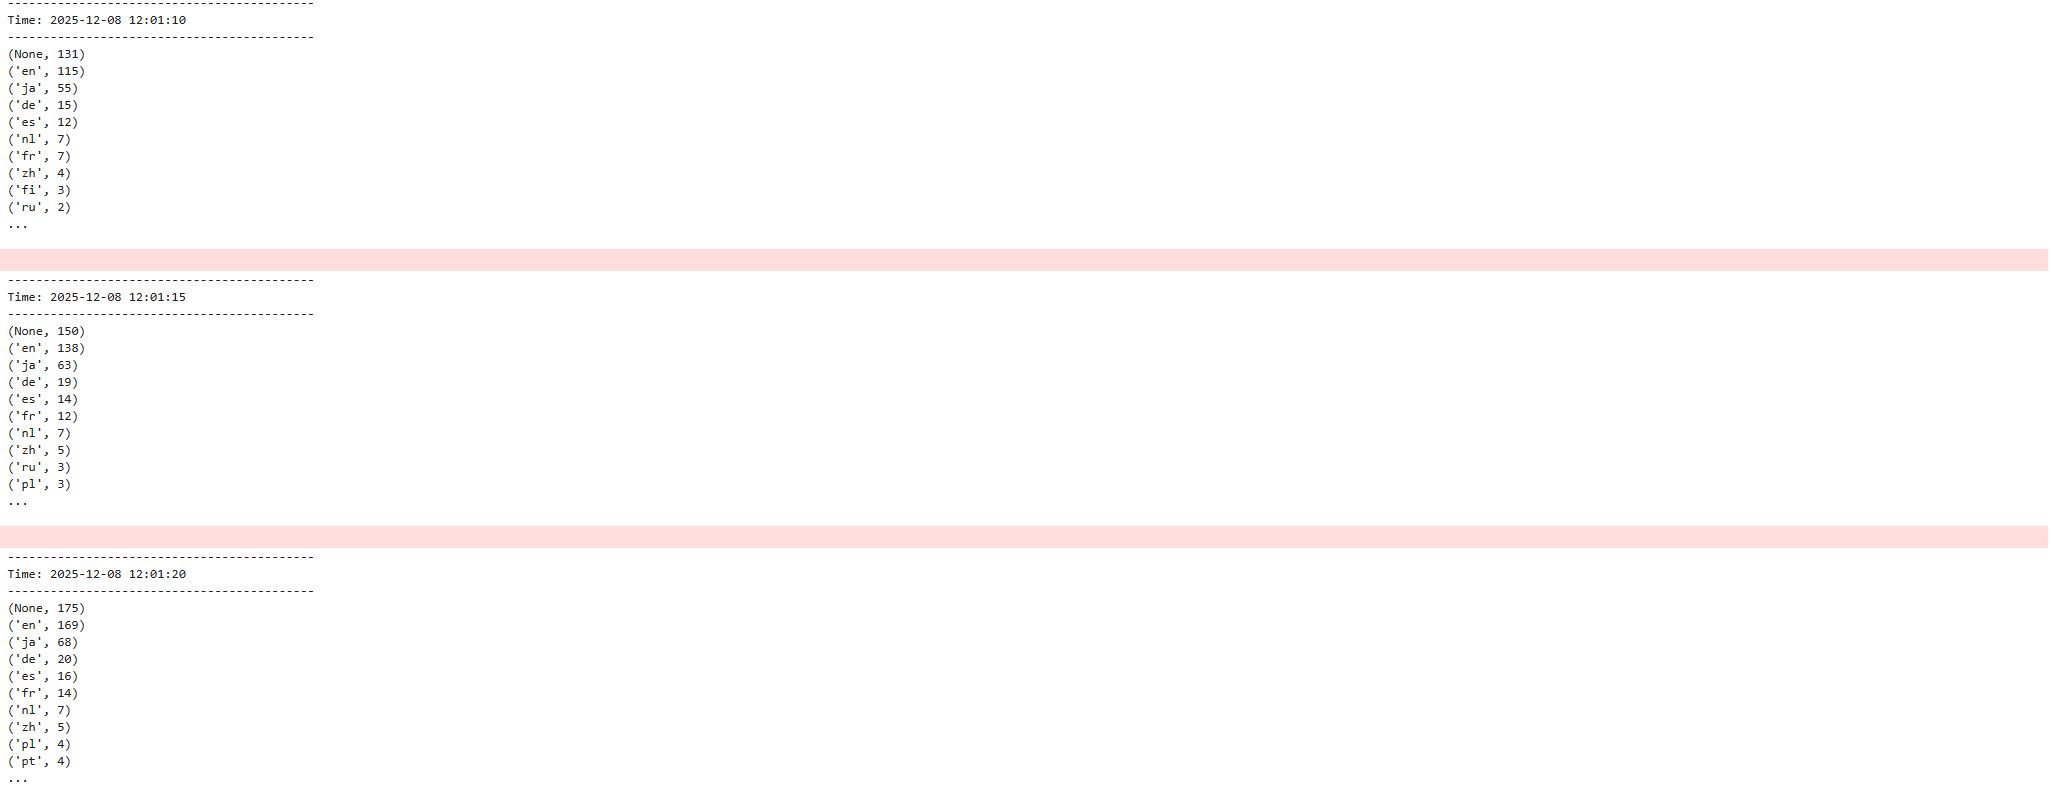

### Ejercicio 10.5: Powering Up (1 punto)


Muy bien, ya sabemos que los RDDs en Spark son increíblemente versátiles: 
son como la navaja suiza del procesamiento de datos de stream. Puedes hacer prácticamente 
cualquier operación con ellos. Sin embargo, **a medida que las cosas se vuelven más complejas, 
el desafío aumenta.**

Ahora, vamos a hacer nuestro panel de control aún más interesante. En lugar de solo mostrar 
cuántos toots tenemos por minuto, agreguemos algunas características nuevas. 
¿No sería interesante **rastrear la longitud promedio de estos toots?**
Y hay más: vamos a descubrir **quién es el usuario más seguido entre los que han tooteado en ese minuto.**

Espera, **¡hay más!** Para hacer toda esta información súper fácil de leer y entender, vamos a presentarla en un formato de tabla ordenado y limpio. No se trata solo de los datos, sino de hacerlos amigables para el usuario y visualmente digeribles.

La tabla resultante debe actualizarse en intervalos de 5 segundos, y las ventanas de promedio deben ser de 60 segundos. Las columnas de esa tabla deben ser:
    
-   **`lang`:** Idioma
-   **`num_toots`:** Número de toots originales en ese idioma
-   **`avg_len_content`:** Longitud promedio (en caracteres) del contenido del toot
-   **`user`:** Usuario más seguido
-   **`followers`:** Número de seguidores de ese usuario

Para hacer que la salida sea más legible, limita el número de filas a 10.

**TIP:** Hay un ejemplo muy útil en [Spark Streaming](https://downloads.apache.org/spark/docs/3.3.0/streaming-programming-guide.html#dataframe-and-sql-operations). ¡Búscalo!




En la parte final del ejercicio construyo un **dashboard multidimensional** que resume varias métricas por idioma, como el número total de toots, la longitud media de los mensajes y el usuario más popular asociado a cada idioma.

Para conseguirlo, primero extraigo toda la información necesaria durante la fase inicial del `map`, de modo que cada registro ya contiene los datos relevantes para las estadísticas posteriores. A continuación aplico una ventana temporal `window(60, 5)`, que permite agrupar los RDDs generados en intervalos de 60 segundos, actualizados cada 5.

Dentro de esa ventana uso `reduceByKey` para combinar las estadísticas de cada idioma: sumo los conteos, acumulo las longitudes de los mensajes y, cuando corresponde, selecciono al usuario que tenga más seguidores. Finalmente, en el último `map`, calculo la longitud media del mensaje dividiendo la longitud total entre el número de toots y doy forma al resultado para que pueda mostrarse de manera clara en el dashboard.


In [ ]:
import findspark
findspark.init()

from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SparkSession, Row
import json

# Spark Context
app_name = "TootDashboard"

try:
    sc = SparkContext("local[*]", appName=app_name)
except ValueError:
    sc.stop()
    sc = SparkContext("local[*]", appName=app_name)

sc.setLogLevel("ERROR")

# Streaming Context (batch 5s)
batch_interval = 5
ssc = StreamingContext(sc, batch_interval)
ssc.checkpoint("checkpoint")

# Socket Source
socket_host = "localhost"
socket_port = 9999

SocketStream = ssc.socketTextStream(socket_host, socket_port)

# Solo toots originales 
filtered = (
    SocketStream
    .map(lambda x: json.loads(x))
    .filter(lambda t: t.get("reblog") is None)
)

# Ventana 60s deslizándose cada 5s
windowed = filtered.window(60, 5)

# Mapeo: (lang, (count, total_len, user, followers))
tootPairs = windowed.map(
    lambda t: (
        t.get("language"),
        (
            1,
            len(t.get("content", "")),
            t["account"].get("username", "unknown"),
            t["account"].get("followers_count", 0)
        )
    )
)

# Función para combinar valores por clave
def merge_vals(a, b):
    count = a[0] + b[0]
    total_len = a[1] + b[1]

    # Elegimos el usuario con más followers
    if a[3] >= b[3]:
        top_user, top_followers = a[2], a[3]
    else:
        top_user, top_followers = b[2], b[3]

    return (count, total_len, top_user, top_followers)

aggregated = tootPairs.reduceByKey(merge_vals)

# Procesado final en DataFrame
def process_batch(rdd):
    # Primer df vacío, da error
    if rdd.isEmpty():
        return
        
    # SparkSession para devolver dataframe
    spark = SparkSession.builder.getOrCreate()

    rows = rdd.map(lambda x: Row(
        lang=x[0],
        num_toots=x[1][0],
        avg_len_content=(x[1][1] / x[1][0]) if x[1][0] > 0 else 0.0,
        user=x[1][2],
        followers=x[1][3]
    ))

    df = spark.createDataFrame(rows)

    print("\n---------------------- DASHBOARD ----------------------")
    df.orderBy(df.num_toots.desc()).show(10, truncate=False)

# Comenzamos el streaming
aggregated.foreachRDD(process_batch)

try:
    ssc.start()
    ssc.awaitTermination()
except KeyboardInterrupt:
    ssc.stop(stopGraceFully=True)
    sc.stop()


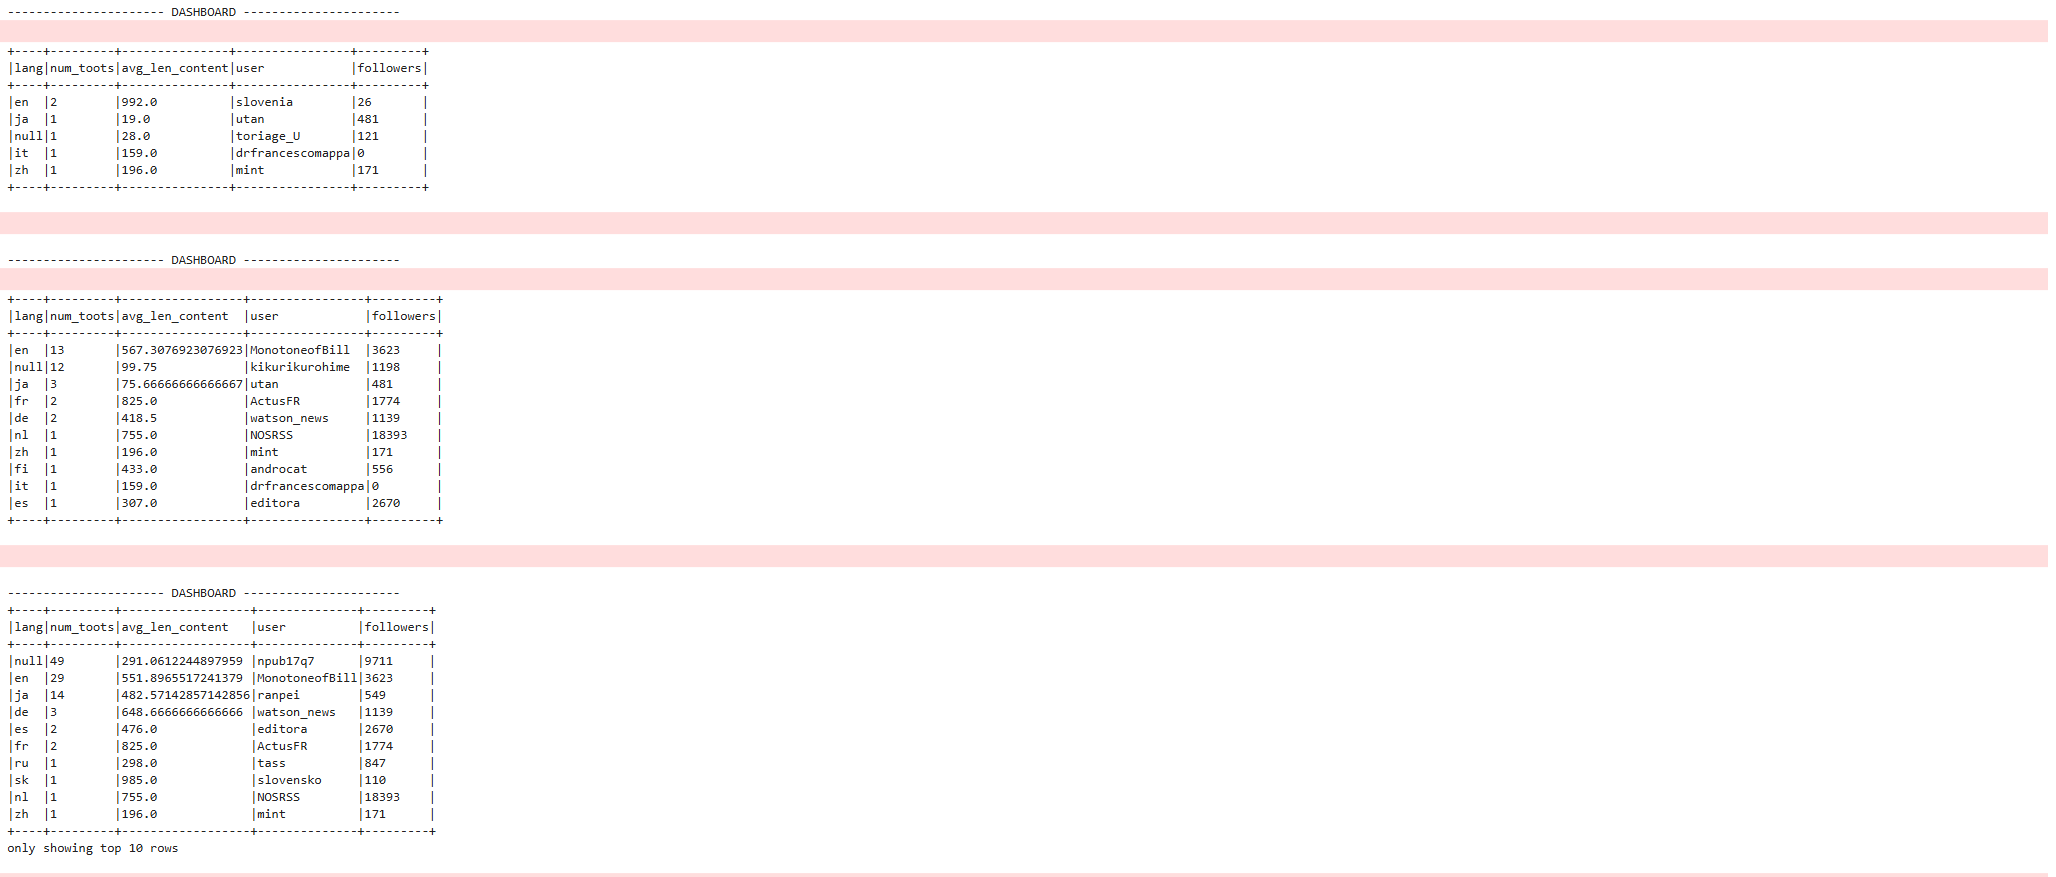

El resultado es un *dashboard* claro, limpio y ordenado donde se puede extraer información valiosa de un simple vistado como:

* **Inglés domina claramente**, lo cual tiene sentido dado el alcance global de Mastodon.
* El usuario más influyente **cambia dinámicamente cada 5 segundos**
* Los toots en ingés suelen ser los **más largos en promedio**.

## Ejercicio 11: Structured Streaming (3 puntos)

Como has visto en el último ejercicio, dependiendo de las operaciones, 
la API de Spark Streaming puede no resultar tan conveniente, 
especialmente porque tienes que tratar con APIs de bajo nivel. Afortunadamente, **Spark provides a
high-level API called [Spark Structured
Streaming](https://downloads.apache.org/spark/docs/3.3.0/structured-streaming-programming-guide.html)** que te permite **expresar los cálculos de streaming de la misma manera que expresarías un cálculo por lotes sobre datos estructurados estáticos**, como los que usarías en el procesamiento por lotes.

En este conjunto de ejercicios, te sumergirás en el fascinante mundo de Spark Structured Streaming.

### Ejercicio 11.1: Getting the Schema (0.5 puntos)

Una de las características más interesantes de Spark Structured Streaming es 
**cómo maneja los datos estructurados**. Por ejemplo, el flujo de datos en nuestro tema de Kafka, 
donde **cada "toot" viene en un formato JSON ordenado**, lo que lo hace estructurado y organizado.

De manera similar a cómo se trabaja con DataFrames en Spark, **Structured Streaming usa esquemas de datos para analizar datos estructurados**, esencialmente un plano de cómo están dispuestos los datos. Para el procesamiento por lotes, Spark puede a menudo deducir esta estructura directamente de los datos. Sin embargo, con los datos de streaming, es un poco diferente: **necesitamos definir esta estructura de antemano.**

En los siguientes ejercicios, utilizaremos un truco conveniente: **en lugar de definir manualmente**
la estructura compleja de un "toot", inicialmente **extraeremos algunos toots de Kafka y los analizaremos en un lote para aprender su esquema**. Es como echar un vistazo para entender cómo están organizadas las cosas. 
Una vez que tengamos el esquema, lo aplicaremos a nuestra pipeline de streaming.

Tu tarea en este ejercicio es realizar esta transformación. Luego, utilizando las operaciones de DataFrame con las que ya estás familiarizado, crearás una tabla con las siguientes columnas que nos permitirá ver los toots individualmente a medida que se procesan:


-   **`id`:** Identificador único para cada toot
-   **`created_at`:** Fecha y hora en que se creó el toot
-   **`content`:** El contenido del toot
-   **`language`:** El idioma del toot
-   **`username`:** El nombre de usuario del autor del toot
-   **`followers_count`:** Número de seguidores del autor.


Recuerda que nos **interesan los toots originales**. Filtra aquellos que son retweets.

Otro aspecto fundamental que debes gestionar aquí es **seleccionar el outputMode adecuado**. Consulta la 
[the documentation](https://downloads.apache.org/spark/docs/3.3.0/structured-streaming-programming-guide.html#output-modes)
y elige el que mejor se adapte a este ejercicio.


In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, StructType, StructField
from pyspark import SparkConf, SparkContext
from pyspark.sql.functions import json_tuple, from_json, col
from pyspark.sql import SparkSession

conf = SparkConf()
conf.setMaster("local[*]")
sc = SparkContext(conf=conf)
sc.setLogLevel("ERROR")

# Initialize Spark Session for Structured Streaming
app_name = "activity3_1_jubedaq"  # Incluye mi username

spark = SparkSession \
    .builder \
    .appName(app_name) \
    .getOrCreate()

# Define Kafka parameters
kafka_topic = "mastodon_toots_original"  # El tema comentado en el foro
kafka_bootstrap_servers = "eimtcld3node1:9092"  # Servidor Kafka
 
# Read a small batch of data from Kafka for schema inference!
batch_df = spark \
    .read \
    .format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", kafka_topic) \
    .option("startingOffsets", "earliest") \
    .load()

# Infer schema
schema = spark.read.json(batch_df.selectExpr("CAST(value AS STRING)").rdd.map(lambda x: x[0])).schema

# Create streaming DataFrame by reading data from Kafka
toots = spark \
    .readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", kafka_topic) \
    .option("startingOffsets", "latest") \
    .load()

# Parse the value column as JSON and apply the infered schema. Then select the columns we need.
toots_df = toots\
    .select(from_json(col("value").cast("string"), schema).alias("parsed_value"))\
    .select(
        col("parsed_value.id").alias("id"),
        col("parsed_value.created_at").alias("created_at"),
        col("parsed_value.content").alias("content"),
        col("parsed_value.language").alias("language"),
        col("parsed_value.account.username").alias("username"),
        col("parsed_value.account.followers_count").alias("followers_count")
    )\
    .filter(col("parsed_value.reblog").isNull())

try:
    # Open stream to console (you need to execute it in a terminal to see the output)
    query = toots_df \
            .writeStream \
            .outputMode("append") \
            .format("console") \
            .start()

    query.awaitTermination()
except KeyboardInterrupt:
    query.stop()
    spark.stop()
    sc.stop()

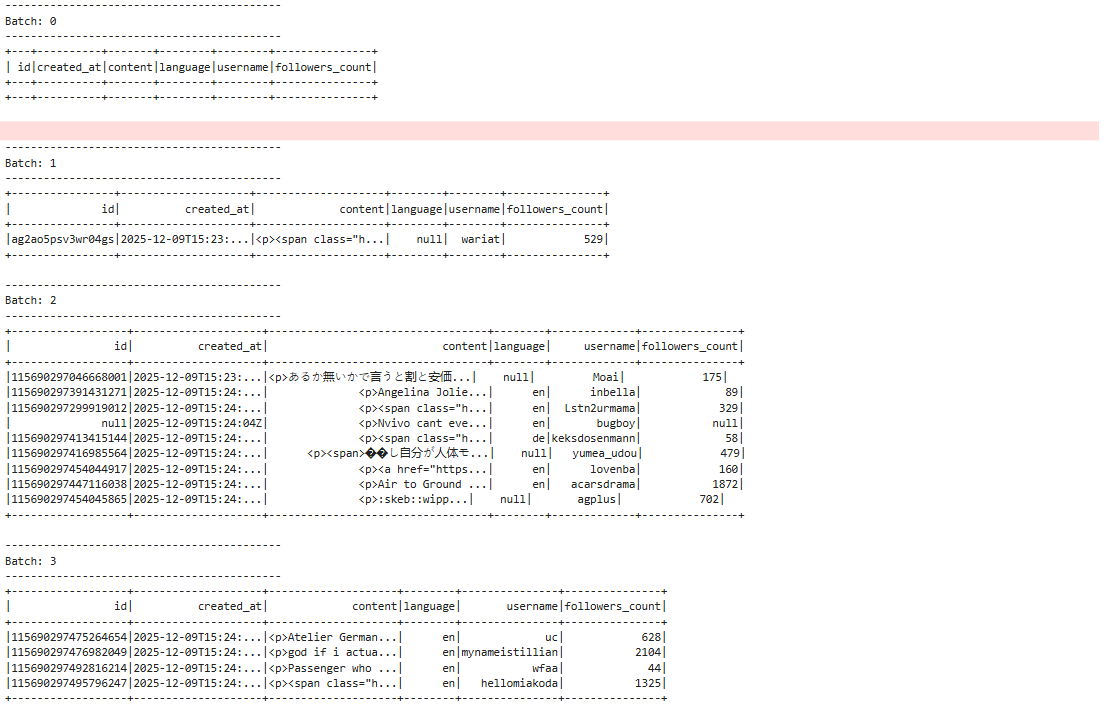

***Observaciones interesantes de los datos:** 
- Algunos toots tienen `id` o `language` null (datos incompletos).
- El idioma que aparece es sobre todo el inglés.
- Los toots incluyen etiquetas HTML.

### Ejercicio 11.2: Agregando Datos desde un Flujo (0.5 puntos)

Spark Structured Streaming es realmente poderoso, especialmente cuando se realizan operaciones sobre un flujo continuo de datos. En este ejercicio, profundizaremos en Structured Spark Streaming, enfocándonos específicamente en la agregación de datos desde un flujo de Kafka. Es similar a lo que hicimos en el Ejercicio 2. Tu misión es **contar el número de toots originales en cada idioma.**

Aquí te mostramos cómo debe ser tu salida:

-   **`language`:** Esta columna muestra el idioma de los toots.
-   **`count`:** Aquí es donde mostrarás el número de toots por cada idioma.

Tu tabla debe **acumular estos conteos cada 10 segundos, y también debe seguir acumulándolos**. Además, hazla  amigable para el usuario **ordenando los idiomas por el número de toots, con los idiomas más conversadores en la parte superior.**

Ahora, aquí hay una **parte clave** de este ejercicio: **necesitas elegir el modo de salida adecuado para tu consulta de streaming**. Recuerda, el modo de **salida determina cómo se escribe cada lote de datos resultante en el destino de salida**. Tus opciones son los modos 'Complete', 'Append' y 'Update'. Piensa cuál encaja mejor para nuestro escenario de conteo acumulativo y ordenado. Y **no olvides escribir tu razonamiento en los comentarios.**



He elegido el modo "complete" porque se realizan operaciones de agregación (`groupBy` + `count`) con ordenamiento (`orderBy`), y este es el único modo que soporta ambas operaciones simultáneamente. 

El modo "append" no funciona con agregaciones que tienen ordenamiento, y el modo "update" soporta  agregaciones pero no permite `orderBy` ya que solo emite las filas modificadas sin mantener una vista completa de todos los datos necesaria para ordenar. Además, "complete" es ideal para el requisito de mostrar conteos cumulativos actualizados cada 10 segundos, ya que escribe toda la tabla de resultados en cada *trigger*, permitiendo ver el estado completo y ordenado de las agregaciones de forma continua.

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, StructType, StructField
from pyspark import SparkConf, SparkContext
from pyspark.sql.functions import from_json, col, window
from pyspark.sql import SparkSession

conf = SparkConf()
conf.setMaster("local[*]")
sc = SparkContext(conf=conf)
sc.setLogLevel("ERROR")

# Initialize Spark Session for Structured Streaming
app_name = "activity3_2_jubedaq"  # Incluye mi username

spark = SparkSession \
    .builder \
    .appName(app_name) \
    .getOrCreate()

# Define Kafka parameters
kafka_topic = "mastodon_toots_original"  
kafka_bootstrap_servers = "eimtcld3node1:9092" 

# Read a small batch of data from Kafka for schema inference!
batch_df = spark \
    .read \
    .format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", kafka_topic) \
    .option("startingOffsets", "earliest") \
    .load()

# Infer schema
schema = spark.read.json(batch_df.selectExpr("CAST(value AS STRING)").rdd.map(lambda x: x[0])).schema

# Create streaming DataFrame by reading data from Kafka
toots = spark \
    .readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", kafka_topic) \
    .option("startingOffsets", "latest") \
    .load()  # "latest" para leer solo mensajes nuevos

# Parse the value column as JSON and apply the infered schema. Then select the columns we need.
toots_df = toots\
    .select(from_json(col("value").cast("string"), schema).alias("parsed_value"))\
    .filter(col("parsed_value.reblog").isNull())\
    .select(col("parsed_value.language").alias("language"))\
    .groupBy("language")\
    .count()\
    .orderBy(col("count").desc())

try:
    # Open stream to console (you need to execute it in a terminal to see the output)
    query = toots_df \
            .writeStream \
            .outputMode("complete") \
            .format("console") \
            .option("truncate", "false") \
            .trigger(processingTime="10 seconds") \
            .start()
    
    query.awaitTermination()
except KeyboardInterrupt:
    query.stop()
    spark.stop()
    sc.stop()

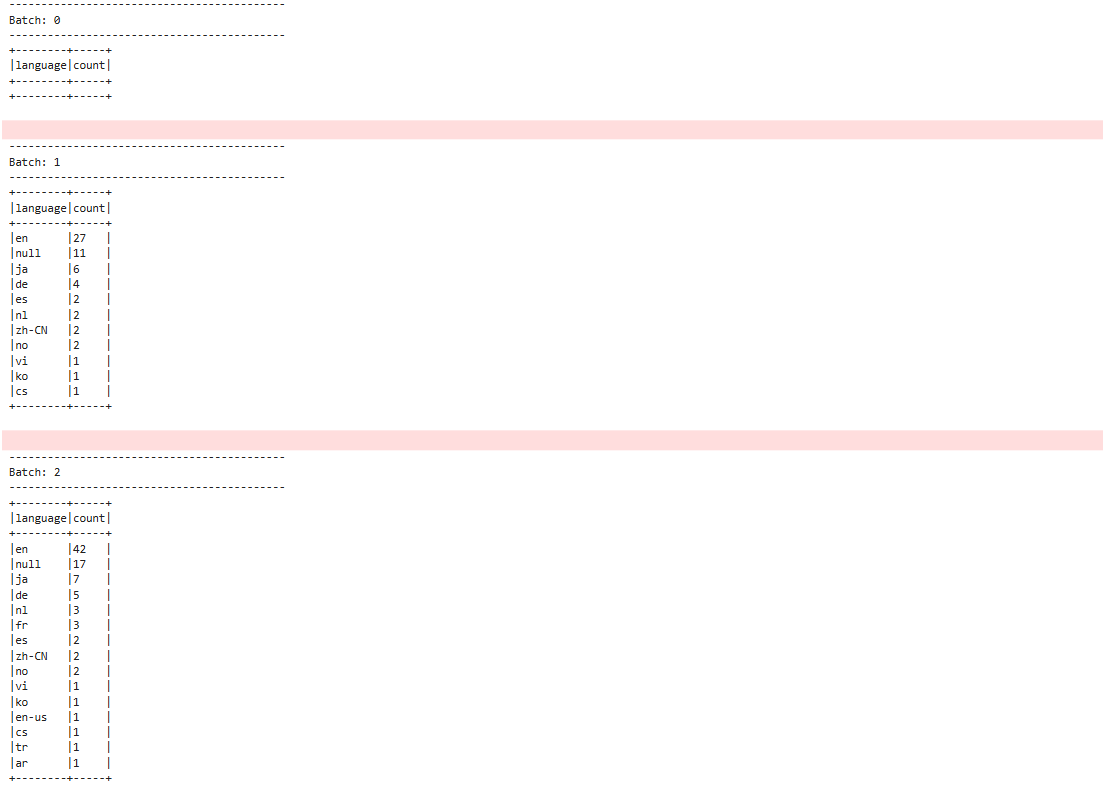

### Ejercicio 11.3: Windowed Counting (1 punto)

¡Buen trabajo! Has aprendido a realizar agregaciones y a hacer un seguimiento de los conteos a lo largo del tiempo. Como notaste en el Ejercicio 2.4, a veces es más efectivo mantener estos conteos en **specific time windows**. Ahora, queremos que apliques esta técnica utilizando [functions available in Spark Structured
Streaming](https://downloads.apache.org/spark/docs/3.3.0/structured-streaming-programming-guide.html#window-operations-on-event-time). 
Ten en cuenta que Spark Structured Streaming maneja el tiempo de manera diferente a Spark Streaming, por lo que deberás considerar esto al analizar e interpretar los resultados.

Tu tarea es **crear una tabla que muestre un conteo de la cantidad de toots originales (recuerda filtrar los retweets) realizados en cada idioma, segmentados dentro de un marco de tiempo específico.** Para este ejercicio, debes usar una sliding window de un minuto, con los datos refrescándose cada 5 segundos. Este enfoque te permitirá monitorear de cerca la frecuencia de los toots en diferentes idiomas a lo largo de intervalos breves y superpuestos.

Te pedimos que proporciones una tabla con la siguiente estructura:

- **`window`:** Muestra el rango de tiempo
- **`language`:** Esta columna muestra el idioma de los toots.
- **`count`:** Aquí es donde mostrarás el número de toots para cada idioma.

Los resultados deben **ordenarse por time window y conteo en orden descendente.**


Para este ejercicio utilizamos el modo `complete` porque estamos realizando agregaciones con ventanas de tiempo (`window` + `groupBy` + `count`) y además necesitamos ordenar los resultados (`orderBy`). 

Al igual que en el ejercicio anterior, el modo `complete` es el único que soporta agregaciones con ordenamiento, escribiendo toda la tabla de resultados en cada trigger. Las ventanas deslizantes (*sliding windows*) de 1 minuto con actualización cada 5 segundos permiten que un mismo evento aparezca en múltiples ventanas superpuestas, proporcionando una vista continua y detallada de la actividad en tiempo real. 

El timestamp usado es `created_at` del toot, que representa el event time (tiempo del evento), no el processing time (tiempo de procesamiento), lo cual es fundamental en streaming para mantener la precisión temporal independientemente de cuándo lleguen los datos.

In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, StructType, StructField
from pyspark import SparkConf, SparkContext
from pyspark.sql.functions import json_tuple, from_json, col, window
from pyspark.sql import SparkSession

conf = SparkConf()
conf.setMaster("local[*]")
sc = SparkContext(conf=conf)
sc.setLogLevel("ERROR")

# Initialize Spark Session for Structured Streaming
app_name = "activity3_3_jubedaq"  # Incluye mi username

spark = SparkSession \
    .builder \
    .appName(app_name) \
    .getOrCreate()

# Define Kafka parameters
kafka_topic = "mastodon_toots_original"  
kafka_bootstrap_servers = "eimtcld3node1:9092" 

# Read a small batch of data from Kafka for schema inference!
batch_df = spark \
    .read \
    .format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", kafka_topic) \
    .option("startingOffsets", "earliest") \
    .load()

# Infer schema
schema = spark.read.json(batch_df.selectExpr("CAST(value AS STRING)").rdd.map(lambda x: x[0])).schema

# Create streaming DataFrame by reading data from Kafka
toots = spark \
    .readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", kafka_topic) \
    .option("startingOffsets", "latest") \
    .load()  # "latest" para leer solo mensajes nuevos

# Parse the value column as JSON and apply the infered schema. Then select the columns we need.
toots_df = toots\
    .select(from_json(col("value").cast("string"), schema).alias("parsed_value"))\
    .filter(col("parsed_value.reblog").isNull())\
    # TIMESTAMP
    .select(
        col("parsed_value.created_at").alias("created_at"),
        col("parsed_value.language").alias("language")
    )\
    .groupBy(
        window(col("created_at"), "1 minute", "5 seconds"),
        "language"
    )\
    .count()\
    .orderBy(col("window"), col("count").desc())

try:
    # Open stream to console (you need to execute it in a terminal to see the output)
    query = toots_df \
            .writeStream \
            .outputMode("complete") \
            .format("console")\
            .option("truncate", "false")\
            .trigger(processingTime="5 seconds")\
            .start()
    
    query.awaitTermination()
except KeyboardInterrupt:
    query.stop()
    spark.stop()
    sc.stop()

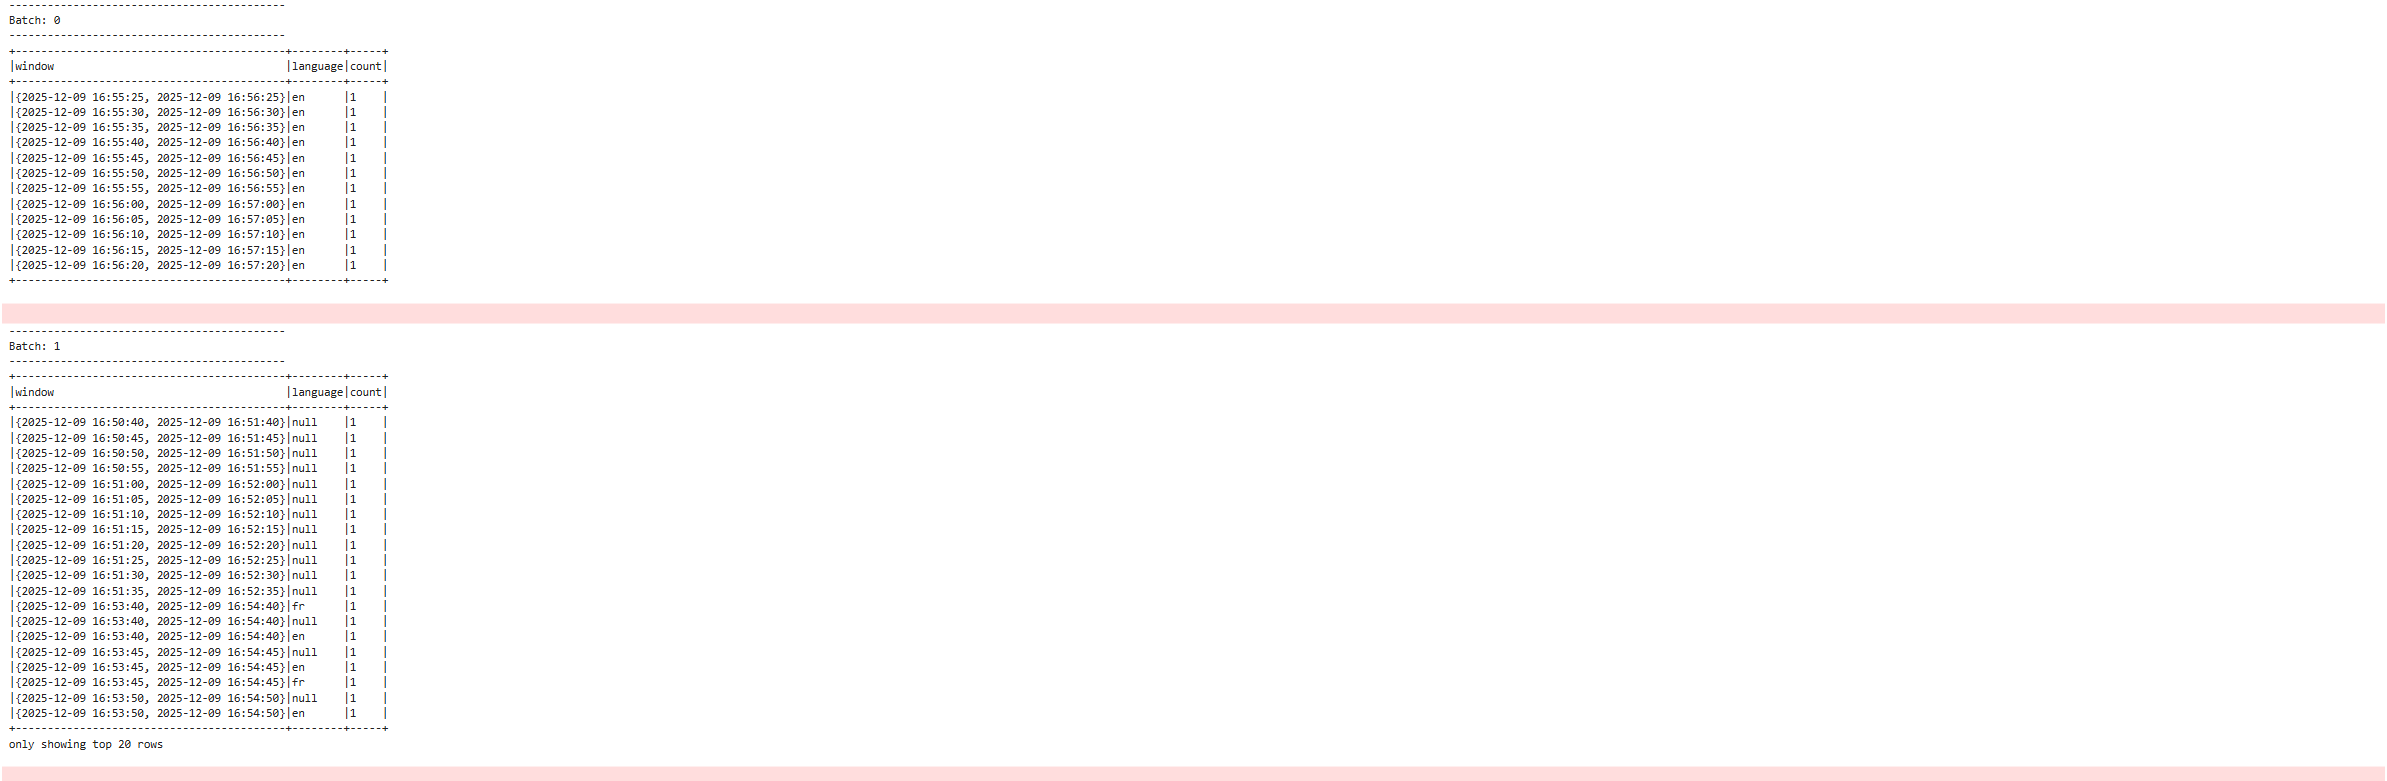

### Ejercicio 11.4: Unir Flujos (1 punto)

En este último ejercicio, exploraremos una característica muy interesante de Spark Streaming que te permite unir 
**[unir dos streams](https://downloads.apache.org/spark/docs/3.3.0/structured-streaming-programming-guide.html#stream-stream-joins)
y analizarlos!**


Para simplificar las cosas, ya te proporcionamos dos flujos de datos pre-agregados. 
El primero, que se encuentra en el tema de Kafka **`mastodon_toots_original_domain`**, muestra el conteo de toots originales para varias instancias de Mastodon (recuerda que Mastodon es una federación de instancias) durante **fixed one-minute window**. 
El segundo flujo, en el **`mastodon_toots_retoot_domain` topic**,, presenta datos similares, pero para los toots que son retweets (compartidos) de otros toots. Los datos almacenados en los temas de Kafka tienen la misma estructura en formato JSON:

- Una `window` estructura con dos elementos `string` type: `start` and `end` 
- Un componente `string` llamado `mastodon_instance` con el topic.
- Un elemento de tipo `integer` llamado `count` con el número de toots ealizados en ese dominio en el rango de tiempo específico.

Dado que la estructura de los datos es bastante sencilla, esta vez **te pedimos que la definas manualmente**, en lugar de usar el truco de batch. Una vez que hayas configurado las estructuras, **deberás abrir un flujo para cada fuente de Kafka.** El siguiente paso es unir estos flujos. Queremos que realices una **left join del flujo de toots originales con el flujo de retweets**. Después de completar la unión, tu salida debe incluir:


- **`window`:** el rango de tiempo
- **`mastodon_instance`:** el dominio de la instancia de Mastodon
- **`original_count`:** número de toots originales publicados en ese dominio durante ese rango de tiempo
- **`retweet_count`:** número de toots de retweets publicados en ese dominio durante ese rango de tiempo

**TIP**: Realizar una unión en línea de dos flujos no es una tarea fácil, y hay muchas restricciones que debes respetar. 
Lee cuidadosamente [la documentación](https://downloads.apache.org/spark/docs/3.3.0/structured-streaming-programming-guide.html#stream-stream-joins)
y recuerda que estamos usando la versión 2.4.0. 
Además, recuerda que estamos realizando **join over time**, y este es un componente **clave**. 
Conceptos como los que has aprendido sobre windows son fundamentales junto con conceptos como [watermarking](https://downloads.apache.org/spark/docs/3.3.0/structured-streaming-programming-guide.html#stream-stream-joins).
Y recuerda, **los modos de salida son complicados** y debes elegir uno que sea adecuado para el trabajo que deseas hacer.


En este ejercicio combino dos flujos de datos en tiempo real, estructurándolos manualmente y sincronizándolos mediante marcas temporales basadas en el *event time* para mantener coherencia incluso con retrasos. Los intervalos temporales se convierten a *timestamp* y se aplica *watermarking* para limitar la acumulación y permitir uniones válidas solo dentro de ventanas consolidadas. La unión se configura de forma que uno de los flujos actúa como referencia y el otro aporta información cuando está disponible, generando un único stream enriquecido con los valores de ambos orígenes. Finalmente, la salida usa un modo adecuado para emitir solo resultados completos y estables una vez que las marcas de agua confirman que no llegarán más eventos atrasados.


In [ ]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.types import StringType, StructType, StructField, IntegerType
from pyspark import SparkConf, SparkContext
from pyspark.sql.functions import from_json, col, to_timestamp
from pyspark.sql import SparkSession

# Initialize Spark Context
conf = SparkConf()
conf.setMaster("local[*]")
sc = SparkContext(conf=conf)
sc.setLogLevel("ERROR")

# Initialize Spark Session for Structured Streaming
app_name = "activity3_4_jubedaq"  # Incluye mi username
spark = SparkSession \
    .builder \
    .appName(app_name) \
    .getOrCreate()

# Define schema for the incoming data
schema = StructType([
    StructField("window", StructType([
        StructField("start", StringType(), True),
        StructField("end", StringType(), True)
    ]), True),
    StructField("mastodon_instance", StringType(), True),
    StructField("count", IntegerType(), True)
])

# Define Kafka parameters
toots_original_topic = 'mastodon_toots_original_domain'
toots_retoot_topic = 'mastodon_toots_retoot_domain'
kafka_bootstrap_servers = 'eimtcld3node1:9092' 

# Create streaming DataFrame by reading original toots data from Kafka
toots_original = spark \
    .readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", toots_original_topic) \
    .option("startingOffsets", "earliest") \
    .load()

# Parse the value column as JSON and apply the infered schema. Then select the columns we need.
toots_original_df = toots_original \
    .select(from_json(col("value").cast("string"), schema).alias("parsed_value")) \
    .select(
        col("parsed_value.window"),
        col("parsed_value.mastodon_instance"),
        col("parsed_value.count").alias("original_count"),
        # Convertimos el string 'end' del JSON a Timestamp real para el watermark
        col("parsed_value.window.end").cast("timestamp").alias("event_time")
    ) \
    .withWatermark("event_time", "2 minutes")

# Create streaming DataFrame by reading retoots data from Kafka
toots_retoot = spark \
    .readStream \
    .format("kafka") \
    .option("kafka.bootstrap.servers", kafka_bootstrap_servers) \
    .option("subscribe", toots_retoot_topic) \
    .option("startingOffsets", "earliest") \
    .load()

# Parse the value column as JSON and apply the infered schema. Then select the columns we need.
toots_retoot_df = toots_retoot \
    .select(from_json(col("value").cast("string"), schema).alias("parsed_value")) \
    .select(
        col("parsed_value.window"),
        col("parsed_value.mastodon_instance"),
        col("parsed_value.count").alias("retweet_count"),
        # Convertimos igual que arriba
        col("parsed_value.window.end").cast("timestamp").alias("event_time")
    ) \
    .withWatermark("event_time", "2 minutes")

# Join the two streams
toots_join_df = toots_original_df.join(
    toots_retoot_df, 
    on=["window", "mastodon_instance", "event_time"], 
    how="left"
)

# Columnas finales 
final_output = toots_join_df.select(
    "window", "mastodon_instance", "original_count", "retweet_count"
)

try:
    # Start running the query that prints the running counts to the console
    query = toots_join_df\
            .writeStream \
            .outputMode("append") \
            .format("console") \
            .option("truncate", "false") \
            .option("numRows", 100)\
            .start()

    query.awaitTermination()
except KeyboardInterrupt:
    query.stop()
    spark.stop()
    sc.stop()


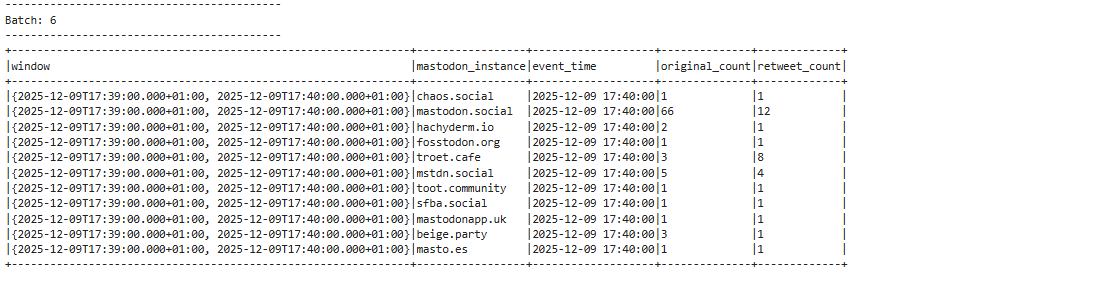